Files already downloaded and verified


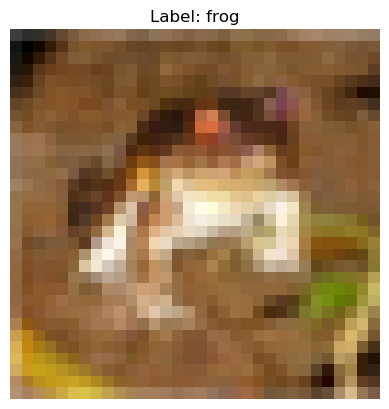

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a transform to convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the CIFAR-10 training set
trainset = torchvision.datasets.CIFAR10(root='~/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=False)

# Define class labels
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Get one batch (the first image)
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Convert tensor image to numpy for plotting
npimg = images[0].numpy().transpose((1, 2, 0))

# Plot the image
plt.imshow(npimg)
plt.title(f'Label: {classes[labels[0]]}')
plt.axis('off')
plt.show()

In [3]:
type(images)
images.shape

torch.Size([1, 3, 32, 32])

In [64]:
import inversefed
setup = inversefed.utils.system_startup()


dm = torch.as_tensor(inversefed.consts.cifar10_mean, **setup).reshape(-1, 1,1)
ds = torch.as_tensor(inversefed.consts.cifar10_std, **setup).reshape(-1,1,1)

Currently evaluating -------------------------------:
Monday, 20. October 2025 12:26PM
CPUs: 4, GPUs: 1 on bm1-System-Product-Name.
GPU : NVIDIA GeForce GTX 1060 6GB


In [65]:
    # ground_truth_image = torch.as_tensor(np.array(Image.open("auto.jpg").resize((32, 32), Image.BICUBIC)) / 255, 
    #                                      **setup)
    
    # ground_truth = ground_truth_image.permute(2, 0, 1).sub(dm).div(ds).unsqueeze(0).contiguous()
    # labels = torch.as_tensor((1,), device=setup['device'])

In [66]:
# 1.  3, 32, 32
# 2.  /255

0.0
1.0
(32, 32, 3)
<class 'numpy.ndarray'>


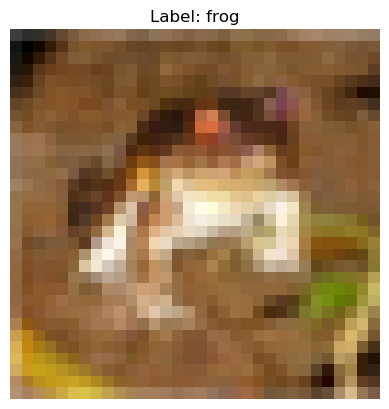

In [67]:

# npimg = images[0].numpy().transpose((1, 2, 0))
print(npimg.min())
print(npimg.max())
print(npimg.shape)
print(type(npimg))
t_image = torch.as_tensor(npimg)

# Plot the image
plt.imshow(npimg)
plt.title(f'Label: {classes[labels[0]]}')
plt.axis('off')
plt.show()

In [68]:
t_image.shape

torch.Size([32, 32, 3])

In [69]:
t_image = t_image.to('cuda')

In [70]:
dm = dm.permute(2,1,0)
ds = ds.permute(2,1,0)
dm = dm.to('cuda')
ds = ds.to('cuda')

In [71]:
t_f_plot = t_image.sub(dm).div(ds)

In [72]:
t_f_plot.max()

tensor(2.0942, device='cuda:0')

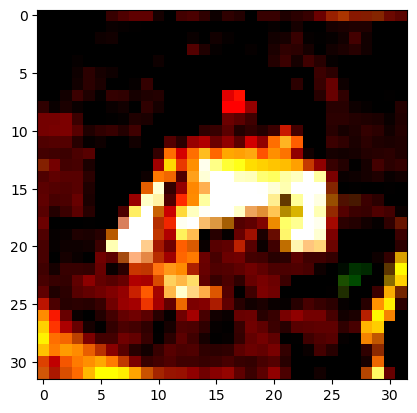

In [73]:
plt.imshow(t_f_plot.clamp_(0,1).cpu())

In [74]:
t_f_plot.max()

tensor(1., device='cuda:0')